In [503]:
import torch
import torch.nn as nn
from torchviz import make_dot, make_dot_from_trace
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import entrezpy.conduit

In [504]:
def read_sequences_from_file(file_name):
    with open(file_name, 'r') as f:
        lines = f.read().replace("\n", "")
    sequences_list = lines.split(",")
    return sequences_list

In [505]:
pathogenic_sequences_list = read_sequences_from_file("Pathogenic2.txt")

In [506]:
len(pathogenic_sequences_list)

19

In [507]:
print(pathogenic_sequences_list[0][:20])

AGCAATACTCTGTCGCAAAA


In [508]:
benign_sequences_list = read_sequences_from_file("Benign2.txt")

In [509]:
print(benign_sequences_list[0][:20])

AGACCAGCCTACACAATATG


In [510]:
len(benign_sequences_list)

19

In [511]:
notreported_sequences_list = read_sequences_from_file("Unknown1.txt")

In [512]:
len(notreported_sequences_list)

10

In [513]:
file_pathogenicity = [1,0]

In [514]:
file_pathogenicity_data = [pathogenic_sequences_list, benign_sequences_list]

In [515]:
all_sequences_data = []
all_sequences_data_target = []

In [516]:
for i in range(len(file_pathogenicity_data)):
    current_sequence_list = file_pathogenicity_data[i]
    for sequence in current_sequence_list:
        all_sequences_data.append(sequence)
        all_sequences_data_target.append(file_pathogenicity[i])

In [517]:
print(len(all_sequences_data))
print(len(all_sequences_data_target))

38
38


In [518]:
print(all_sequences_data[5][:20])

TAACATGTACATTTTTATTC


In [519]:
print(all_sequences_data_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [520]:
sequence_lengths = []
for s in all_sequences_data:
    sequence_lengths.append(len(s))

In [521]:
average_sequence_length = np.mean(sequence_lengths)

In [522]:
print(average_sequence_length)

2001.921052631579


In [523]:
median_sequence_length = np.median(sequence_lengths)

In [524]:
print(median_sequence_length)

2001.0


In [525]:
min_length = np.min(sequence_lengths)
max_length = np.max(sequence_lengths)

In [526]:
print(min_length)
print(max_length)

1981
2012


In [527]:
print(sequence_lengths)

[2001, 2008, 2001, 2005, 2001, 2012, 2001, 2000, 2008, 2001, 2001, 2005, 2001, 2001, 2008, 2012, 2001, 2001, 2006, 2001, 2001, 1981, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001]


In [528]:
np.sum(all_sequences_data_target)

19

In [529]:
print(len(sequence_lengths))

38


In [530]:
def convert_to_num(sequence):
    letter_to_num_map = {"A":1, "C":2, "T":3, "G":4, "N":5}
    converted_sequence = [letter_to_num_map[x] for x in sequence]
    return converted_sequence

In [531]:
convert_to_num("ACTGTGTGTGTGCGGAGAGAGTGGGGCGTCGTGATGCAGGCTAGGTCAGANNNNGNANTANCANTNANGANTNN")

[1,
 2,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 2,
 4,
 4,
 1,
 4,
 1,
 4,
 1,
 4,
 3,
 4,
 4,
 4,
 4,
 2,
 4,
 3,
 2,
 4,
 3,
 4,
 1,
 3,
 4,
 2,
 1,
 4,
 4,
 2,
 3,
 1,
 4,
 4,
 3,
 2,
 1,
 4,
 1,
 5,
 5,
 5,
 5,
 4,
 5,
 1,
 5,
 3,
 1,
 5,
 2,
 1,
 5,
 3,
 5,
 1,
 5,
 4,
 1,
 5,
 3,
 5,
 5]

In [532]:
def pad_sequence(sequence, desired_length):
    sequence_length = len(sequence)
    if sequence_length < desired_length:
        num_pads_needed = desired_length - sequence_length
        pad = []
        for i in range(num_pads_needed):
            pad.append(0)
        result = sequence + pad
        return result
    else:
        return sequence

In [533]:
all_sequences_data_target

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [534]:
def split_or_pad(sequence, desired_length):
    seq_length = len(sequence)
    if seq_length > desired_length:
        new_sequences = []
        for i in range(0, seq_length, desired_length):
            current_chunk = sequence[i: i + desired_length]
            current_chunk_num = convert_to_num(current_chunk)
            current_chunk_num_padded = pad_sequence(current_chunk_num, desired_length)
            new_sequences.append(current_chunk_num_padded)
        return new_sequences
    else:
        sequence_num = convert_to_num(sequence)
        return [pad_sequence(sequence_num, desired_length)]

In [535]:
cleaned_data = []
cleaned_data_targets = []
for i in range(len(all_sequences_data)):
    print(i)
    current_sequence = all_sequences_data[i]
    # if len(current_sequence) > 180000000:
           # continue
    cleaned_sequence_list = split_or_pad(current_sequence, 2020)
    for s in cleaned_sequence_list:
        cleaned_data.append(s)
        cleaned_data_targets.append(all_sequences_data_target[i])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37


In [536]:
print(cleaned_data_targets)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [537]:
cleaned_data, cleaned_data_targets = shuffle(cleaned_data, cleaned_data_targets)

In [538]:
len(cleaned_data[0])

2020

In [539]:
print(cleaned_data_targets)

[0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1]


In [540]:
# num_sequences_desired = 1000
# count_pathogenic_desired = 0
# count_benign_desired = 0
# cleaned_data_balanced = []
# cleaned_data_balanced_targets = []
# for i in range(len(cleaned_data)):
#     sequence = cleaned_data[i]
#     target = cleaned_data_targets[i]
#     if target == 1:
#         if count_pathogenic_desired < num_sequences_desired:
#             cleaned_data_balanced.append(sequence)
#             cleaned_data_balanced_targets.append(target)
#             count_pathogenic_desired = count_pathogenic_desired + 1
#     elif target == 0:
#         if count_benign_desired < num_sequences_desired:
#             cleaned_data_balanced.append(sequence)
#             cleaned_data_balanced_targets.append(target)
#             count_benign_desired = count_benign_desired + 1
#     if count_pathogenic_desired == num_sequences_desired and count_benign_desired == num_sequences_desired:
#         break

In [541]:
# cleaned_data = cleaned_data_balanced
# cleaned_data_targets = cleaned_data_balanced_targets

In [542]:
print(len(cleaned_data))
print(len(cleaned_data_targets))

38
38


In [543]:
print(len(cleaned_data_balanced))
print(len(cleaned_data_balanced_targets))

NameError: name 'cleaned_data_balanced' is not defined

In [544]:
print(cleaned_data_targets)

[0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1]


In [545]:
cleaned_data, cleaned_data_targets = shuffle(cleaned_data, cleaned_data_targets)

In [546]:
print(np.sum(cleaned_data_targets))

19


In [547]:
print(np.sum(cleaned_data_balanced_targets))

NameError: name 'cleaned_data_balanced_targets' is not defined

In [548]:
print(cleaned_data[-1])

[3, 4, 1, 2, 1, 4, 1, 4, 2, 1, 1, 3, 1, 2, 3, 2, 3, 4, 3, 2, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 3, 1, 2, 3, 4, 4, 1, 4, 4, 2, 3, 4, 4, 4, 2, 4, 1, 4, 4, 3, 4, 4, 2, 3, 2, 1, 2, 1, 2, 2, 3, 4, 3, 1, 1, 3, 2, 2, 2, 1, 4, 2, 1, 3, 3, 3, 3, 4, 4, 4, 1, 3, 4, 2, 2, 1, 4, 1, 4, 4, 2, 4, 4, 4, 2, 4, 4, 1, 1, 3, 1, 3, 2, 3, 3, 4, 1, 4, 2, 3, 2, 1, 4, 4, 1, 4, 3, 3, 2, 4, 1, 4, 1, 2, 2, 1, 4, 2, 2, 3, 1, 2, 1, 2, 1, 1, 3, 1, 3, 4, 2, 3, 2, 2, 1, 1, 1, 2, 4, 2, 2, 4, 2, 2, 3, 2, 3, 1, 2, 1, 1, 1, 1, 2, 1, 3, 1, 2, 1, 4, 1, 1, 1, 2, 3, 1, 4, 2, 2, 4, 4, 4, 3, 4, 3, 4, 4, 3, 4, 4, 2, 4, 3, 4, 2, 2, 2, 2, 3, 4, 3, 4, 4, 3, 2, 2, 3, 1, 4, 2, 3, 1, 2, 3, 3, 4, 4, 4, 1, 4, 4, 3, 3, 4, 1, 4, 4, 2, 4, 4, 4, 1, 4, 4, 1, 3, 2, 4, 2, 3, 3, 4, 1, 4, 2, 3, 2, 4, 4, 4, 1, 4, 4, 3, 2, 4, 1, 4, 4, 2, 3, 4, 2, 1, 1, 3, 4, 1, 4, 2, 2, 4, 1, 4, 1, 3, 4, 4, 3, 4, 2, 2, 1, 2, 3, 4, 2, 1, 2, 3, 2, 3, 4, 1, 2, 4, 1, 2, 1, 4, 1, 4, 2, 4, 1, 4, 1, 2, 3, 2, 2, 4, 3, 2, 3, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 

In [549]:
print(len(cleaned_data[1]))

2020


In [550]:
n_input, n_hidden, n_out, batch_size, learning_rate = 2020, 500, 1, 4, 0.0001

In [551]:
print(type(cleaned_data[0]))

<class 'list'>


In [552]:
def convert_data_to_batch_size_tensor(cleaned_data, i, j):
    cleaned_data = cleaned_data[i:j]
    xs = np.array([],dtype = np.float64).reshape(0, len(cleaned_data[0]))
    for sequence in cleaned_data:
        sequence_list = [*sequence]
        sequence_array = np.asarray(sequence_list)
        sequence_array_float = sequence_array.astype(np.float64)
        xs = np.vstack([sequence_array_float, xs])
    return xs

In [553]:
t = convert_data_to_batch_size_tensor(cleaned_data, 0, 4)

In [554]:
t_target = np.asarray(cleaned_data_targets[0:38]).reshape(38,1)

In [555]:
t_target.shape

(38, 1)

In [556]:
data_x = torch.FloatTensor(t)

In [557]:
data_y = torch.FloatTensor(t_target)

In [558]:
print(data_x.size())

torch.Size([4, 2020])


In [559]:
print(data_y.size())

torch.Size([38, 1])


In [560]:
model = nn.Sequential(nn.Linear(n_input, n_hidden), nn.ReLU(), nn.Linear(n_hidden, n_out), nn.Sigmoid())

In [561]:
print(model)

Sequential(
  (0): Linear(in_features=2020, out_features=500, bias=True)
  (1): ReLU()
  (2): Linear(in_features=500, out_features=1, bias=True)
  (3): Sigmoid()
)


In [562]:
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [563]:
losses = []
batch_num = 0
batch_length = 4
for i in range(0,28,batch_length):
    t = convert_data_to_batch_size_tensor(cleaned_data, i, i + batch_length)
    t_target = np.asarray(cleaned_data_targets[i:i+batch_length]).reshape(batch_length,1)
    data_x = torch.FloatTensor(t)
    data_y = torch.FloatTensor(t_target)
    pred_y = model(data_x)
    loss = loss_function(pred_y, data_y)
    losses.append(loss.item())
    model.zero_grad()
    loss.backward()
    optimizer.step()
    batch_num = batch_num + 1
    print(batch_num)

1
2
3
4
5
6
7


In [564]:
losses

[0.31946253776550293,
 0.07545605301856995,
 0.24223503470420837,
 0.08669190853834152,
 0.33214452862739563,
 0.5021647214889526,
 0.3150028586387634]

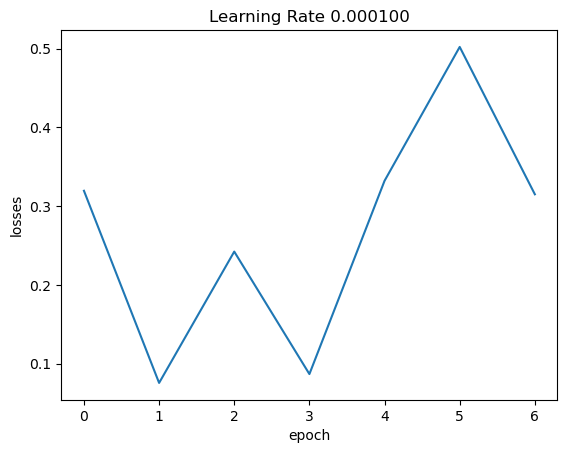

In [565]:
plt.plot(losses)
plt.ylabel("losses")
plt.xlabel("epoch")
plt.title("Learning Rate %f" %(learning_rate))
plt.show()

In [566]:
# model = nn.Sequential(nn.Linear(n_input, n_hidden), nn.ReLU(), nn.Linear(n_hidden, n_out), nn.Sigmoid())
model = nn.Sequential(nn.Linear(n_input, n_hidden_1), nn.ReLU(), nn.Linear(n_hidden_1, n_hidden_2), nn.ReLU(), nn.Linear(n_hidden_2, n_out), nn.Sigmoid())

In [567]:
torch.save(model.state_dict(), "sequence_model.pt")

In [568]:
model.load_state_dict(torch.load("sequence_model.pt"))
model.eval()

Sequential(
  (0): Linear(in_features=2020, out_features=500, bias=True)
  (1): ReLU()
  (2): Linear(in_features=500, out_features=50, bias=True)
  (3): ReLU()
  (4): Linear(in_features=50, out_features=1, bias=True)
  (5): Sigmoid()
)

In [569]:
iter_num = 0
batch_length = 2
percentage_correct = []
for i in range(28,38,batch_length):
    t = convert_data_to_batch_size_tensor(cleaned_data, i, i + batch_length)
    t_target = np.asarray(cleaned_data_targets[i:i+batch_length]).reshape(batch_length,1)
    data_x = torch.FloatTensor(t)
    data_y = torch.FloatTensor(t_target)
    pred_y = model(data_x)
    pred_y_array = pred_y.detach().numpy()
    pred_y_array = np.round(pred_y_array)
    num_correct = (t_target == pred_y_array).sum()
    percentage_correct.append(num_correct/batch_length)
    print(num_correct)
    for j in range(batch_length):
        print("Predicted value: ", pred_y_array[j], " Actual target value: ", t_target[j])

1
Predicted value:  [1.]  Actual target value:  [0]
Predicted value:  [1.]  Actual target value:  [1]
2
Predicted value:  [1.]  Actual target value:  [1]
Predicted value:  [1.]  Actual target value:  [1]
1
Predicted value:  [1.]  Actual target value:  [1]
Predicted value:  [1.]  Actual target value:  [0]
1
Predicted value:  [1.]  Actual target value:  [1]
Predicted value:  [1.]  Actual target value:  [0]
2
Predicted value:  [1.]  Actual target value:  [1]
Predicted value:  [1.]  Actual target value:  [1]


In [570]:
np.mean(percentage_correct)

0.7

In [571]:
torch.save(model.state_dict(), "sequence_model_3.pt")